In [6]:
import sys
sys.path.append("../") # go to parent dir

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from evrp.utils.utilities import create_optimal_edges, create_json_out, update_instance_json, read_instance_json_str, convert_txt_instances_to_csv, trace_routes
from evrp.utils.plot import plot_interactive_graph, plot_evrptwv2g
from evrp.milp.evrptw import EVRPTW

import pandas as pd
import numpy as np

import json

pd.options.plotting.backend = "plotly"

# Convert Schneider instance to E-VRP-TW-V2G

In [3]:
schneider_instance = 'rc105C5'
convert_txt_instances_to_csv(schneider_instance)

 # Full solve

Objective options: {Schneider} OR {OpEx CapEx Cycle EA DCM Delivery}

Constraint options: {Start=End, FullStart=End, NoXkappaBounds, NoMinVehicles, NoSymmetry, NoXd, SplitXp, StationaryEVs}

In [115]:
instance = 'v2g_m06_s7_ca'
fpath = 'config/instances/' + instance + '.csv'

In [174]:
m = EVRPTW(problem_type='OpEx CapEx Cycle EA DCM SplitXp Start=End t_S=4')
m.full_solve(fpath)

2021-04-08 03:42:04 INFO     Building abstract model
2021-04-08 03:42:04 INFO     Defining parameters and sets
2021-04-08 03:42:04 INFO     Defining variables
2021-04-08 03:42:04 INFO     Defining constraints
2021-04-08 03:42:04 INFO     Importing EVRPTW MILP instance: v2g_m06_s7_ca
2021-04-08 03:42:04 INFO     Reading CSV
2021-04-08 03:42:05 INFO     Creating graph
2021-04-08 03:42:05 INFO     Creating timeseries data
2021-04-08 03:42:05 INFO     Creating duplicates and extended graph
2021-04-08 03:42:05 INFO     Using Google Maps Distance API to generate distance matrix
2021-04-08 03:42:05 INFO     Calculating distance matrix
2021-04-08 03:42:05 INFO     Creating parameters
2021-04-08 03:42:05 INFO     Creating instance
2021-04-08 03:42:05 INFO     Problem type: OpEx CapEx Cycle EA DCM SplitXp Start=End t_S=4
2021-04-08 03:42:05 INFO     Solving instance...
2021-04-08 03:44:06 WARNING  Loading a SolverResults object with an 'aborted' status, but containing a solution
2021-04-08 03:44

Using license file /Users/ramiariss/gurobi.lic
Academic license - for non-commercial use only - expires 2021-06-07
Read LP format model from file /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmpkiohkyn2.pyomo.lp
Reading time = 0.03 seconds
x1035: 5130 rows, 843 columns, 34819 nonzeros
Changed value of parameter TimeLimit to 120.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5130 rows, 843 columns and 34819 nonzeros
Model fingerprint: 0x59eb88e5
Variable types: 440 continuous, 403 integer (403 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+04]
  Objective range  [4e-02, 5e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+04]
Presolve removed 1243 rows and 83 columns
Presolve time: 0.14s
Presolved: 3887 rows, 760 columns, 43903 nonzeros
Variable types: 403 continuous, 357 integer (357 binary)

Root

In [175]:
print(m.results)


Problem: 
- Name: x1035
  Lower bound: -1401.2738019095636
  Upper bound: 1614.6079157171268
  Number of objectives: 1
  Number of constraints: 5130
  Number of variables: 843
  Number of binary variables: 403
  Number of integer variables: 403
  Number of continuous variables: 440
  Number of nonzeros: 34819
  Sense: minimize
Solver: 
- Status: aborted
  Return code: 0
  Message: Optimization terminated because the time expended exceeded the value specified in the TimeLimit parameter.
  Termination condition: maxTimeLimit
  Termination message: Optimization terminated because the time expended exceeded the value specified in the TimeLimit parameter.
  Wall time: 120.01714992523193
  Error rc: 0
  Time: 120.16773414611816
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



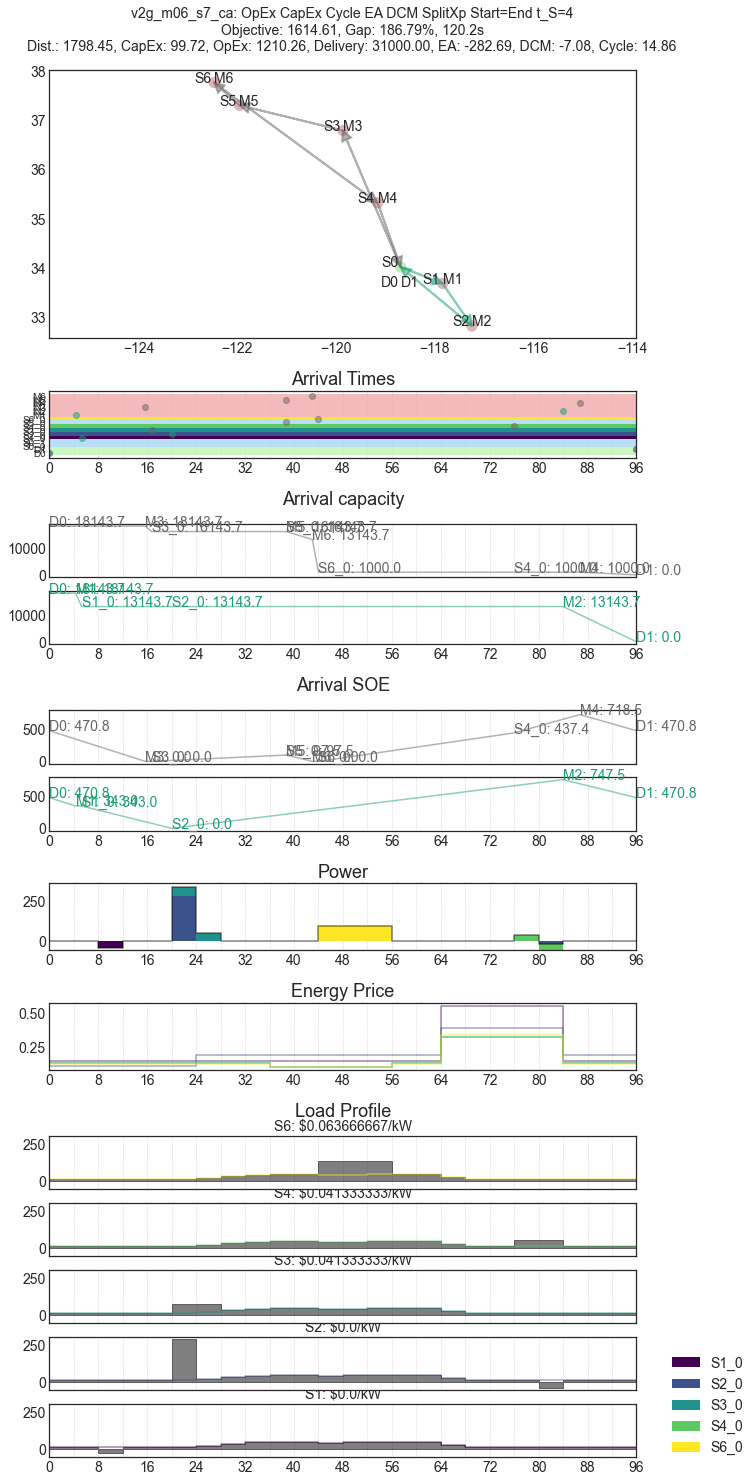

In [176]:
x, xp, traces, routes = plot_evrptwv2g(m, save=True)

In [164]:
dfs = []
for k, v in {'xp': m.instance.xp, 'xc': m.instance.xc, 'xg': m.instance.xg}.items():
    dfs.append(pd.DataFrame.from_dict(data=v.get_values(), orient='index', columns=[k]))
df = pd.concat(dfs, axis=1)
df[(df>0).any(axis=1)]

,xp,xc,xg
"(S1_0, 44)",37.777778,37.777778,0.000000
"(S1_0, 48)",60.000000,60.000000,0.000000
"(S1_0, 52)",60.000000,60.000000,0.000000
"(S1_0, 56)",60.000000,60.000000,0.000000
"(S1_0, 60)",60.000000,60.000000,0.000000
"(S1_0, 68)",-45.000000,0.000000,45.000000
"(S1_0, 72)",-60.000000,0.000000,60.000000
"(S1_0, 76)",-60.000000,0.000000,60.000000
"(S1_0, 80)",-60.000000,0.000000,60.000000
"(S1_0, 84)",35.192481,35.192481,0.000000


In [ ]:
routes

In [21]:
trace_routes(m)

[('D0', 'S1_0', 'M1', 'M2', 'S2_0', 'S0_1', 'D1'),
 ('D0', 'S3_0', 'M3', 'S6_0', 'M6', 'S5_0', 'M5', 'M4', 'S0_0', 'D1')]

In [57]:
m.data['d']

,D0,D1,S0_0,S1_0,S3_0,S16_0,S20_0,C98,C78,C4,C13,C95,C100,C54,C27,C89,C96
D0,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
D1,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
S0_0,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
S1_0,37.054015,37.054015,37.054015,0.000000,36.055513,52.697249,18.357560,29.832868,20.248457,38.483763,59.615434,31.764760,39.661064,54.671748,54.000000,15.231546,32.756679
S3_0,36.235342,36.235342,36.235342,36.055513,0.000000,74.545288,53.075418,7.071068,56.302753,20.518285,35.693137,5.385165,3.605551,73.545904,45.343136,24.738634,3.605551
S16_0,42.755117,42.755117,42.755117,52.697249,74.545288,0.000000,57.008771,67.742158,48.259714,60.299254,71.867934,73.348483,77.317527,6.324555,50.606324,52.201533,72.993150
S20_0,53.460266,53.460266,53.460266,18.357560,53.075418,57.008771,0.000000,47.423623,9.433981,56.797887,77.878110,48.270074,56.639209,60.745370,70.576200,33.541020,49.578221
C98,30.805844,30.805844,30.805844,29.832868,7.071068,67.742158,47.423623,0.000000,50.000000,17.464249,36.000000,6.403124,10.440307,66.940272,41.880783,17.720045,5.385165
C78,50.289164,50.289164,50.289164,20.248457,56.302753,48.259714,9.433981,50.000000,0.000000,56.612719,77.175126,51.971146,59.908263,52.354560,67.186308,33.970576,53.000000
C4,18.110770,18.110770,18.110770,38.483763,20.518285,60.299254,56.797887,17.464249,56.612719,0.000000,21.189620,23.323808,21.400935,58.000000,24.839485,23.259407,21.633308


# Archive, fix route, modify objective, and warmstart solve

In [ ]:
m.archive_instance_result()

In [ ]:
m.fix_variables(['xgamma'])

In [ ]:
m.remake_objective(m.instance, 'Opex Capex EA DCM cycle')

In [ ]:
m.warmstart_solve()

In [ ]:
print(m.results)

In [ ]:
x, xp, traces, routes = plot_evrptwv2g(m)

# Archive, rebuild model to modify constraints, fix route, warmstart solve

In [ ]:
m.archive_instance_result()

In [ ]:
m.instance_archive

In [ ]:
m.remake_model('Opex Capex EA DCM cycle wsplitxgamma', fpath)

In [ ]:
m.set_xgamma('Opex Capex EA DCM cycle')

In [ ]:
m.fix_variables(['xgamma'])

In [ ]:
m.make_solver(solve_options={'TimeLimit': 60 * 5})

In [ ]:
m.warmstart_solve()

In [ ]:
x, xp, traces, routes = plot_evrptwv2g(m)

In [ ]:
routes

# Check infeasible constraints

In [ ]:
from pyomo.util.infeasible import log_infeasible_constraints

In [ ]:
log_infeasible_constraints(m.instance)